In [3]:
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:

scores = ['math score', 'reading score', 'writing score']

for col in scores:
    moyenne = df[col].mean()
    mediane = df[col].median()
    mode = df[col].mode()[0] if not df[col].mode().empty else "Pas de mode"

    print(f"{col} ")
    print(f"Moyenne: {moyenne}")
    print(f"Médiane: {mediane}")
    print(f"Mode: {mode}\n")



math score 
Moyenne: 66.089
Médiane: 66.0
Mode: 65

reading score 
Moyenne: 69.169
Médiane: 70.0
Mode: 72

writing score 
Moyenne: 68.054
Médiane: 69.0
Mode: 74



Lorsque l’on compare la moyenne et la médiane d’une distribution, on peut en déduire sa forme :

Si la moyenne est approximativement égale à la médiane, la distribution est symétrique : les données sont réparties de manière équilibrée autour du centre, sans étirement particulier vers la droite ou la gauche.

Si la moyenne est supérieure à la médiane, la distribution présente une asymétrie positive, c’est-à-dire que la queue de la distribution est étirée vers les valeurs élevées. Cela indique la présence de quelques valeurs très grandes qui augmentent la moyenne, tandis que la majorité des observations reste concentrée sur des valeurs plus faibles.

Si la moyenne est inférieure à la médiane, la distribution présente une asymétrie négative, avec une queue étirée vers les valeurs faibles. Cela traduit la présence de quelques valeurs particulièrement basses qui abaissent la moyenne, alors que la majorité des données se situe sur des valeurs plus élevées.

In [ ]:

scores = ['math score', 'reading score', 'writing score']

for col in scores:
    etendue = df[col].max() - df[col].min()
    variance = df[col].var()
    ecart_type = df[col].std()

    print(f"{col} ")
    print(f"Étendue: {etendue}")
    print(f"Variance: {variance}")
    print(f"Écart-type: {ecart_type}\n")


math score 
Étendue: 100
Variance: 229.91899799799847
Écart-type: 15.163080096009468

reading score 
Étendue: 83
Variance: 213.1656046046047
Écart-type: 14.60019193725222

writing score 
Étendue: 90
Variance: 230.90799199199168
Écart-type: 15.195657010869642



La variance ou l’écart type (σ) mesure la dispersion des données autour de la moyenne.

Si σ < 15, la variabilité est faible : les scores sont relativement proches les uns des autres, ce qui indique une population homogène.

Si σ ≥ 15, la variabilité est forte : les scores sont très dispersés, ce qui reflète une population hétérogène avec de grandes différences entre les valeurs.

In [ ]:

scores = ['math score', 'reading score', 'writing score']

for col in scores:
    q1 = df[col].quantile(0.25)
    q2 = df[col].median()
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr
    valeurs_aberrantes = df[(df[col] < limite_inf) | (df[col] > limite_sup)][col]

    print(f"{col} ")
    print(f"Q1: {q1}, Q2 (Médiane): {q2}, Q3: {q3}")
    print(f"IQR: {iqr}")
    print(f"Limite inférieure: {limite_inf}, Limite supérieure: {limite_sup}")
    print(f"Valeurs aberrantes: {list(valeurs_aberrantes)}\n")


math score 
Q1: 57.0, Q2 (Médiane): 66.0, Q3: 77.0
IQR: 20.0
Limite inférieure: 27.0, Limite supérieure: 107.0
Valeurs aberrantes: [18, 0, 22, 24, 26, 19, 23, 8]

reading score 
Q1: 59.0, Q2 (Médiane): 70.0, Q3: 79.0
IQR: 20.0
Limite inférieure: 29.0, Limite supérieure: 109.0
Valeurs aberrantes: [17, 26, 28, 23, 24, 24]

writing score 
Q1: 57.75, Q2 (Médiane): 69.0, Q3: 79.0
IQR: 21.25
Limite inférieure: 25.875, Limite supérieure: 110.875
Valeurs aberrantes: [10, 22, 19, 15, 23]



Présence de valeurs aberrantes : il existe des scores extrêmes, très élevés ou très faibles, qui peuvent fortement influencer la moyenne et étirer la distribution. Ces valeurs indiquent que certaines observations se démarquent nettement de l’ensemble des données.

Absence de valeurs aberrantes : les scores restent proches de la moyenne, ce qui favorise une distribution normale ou symétrique, avec peu de dispersion extrême.

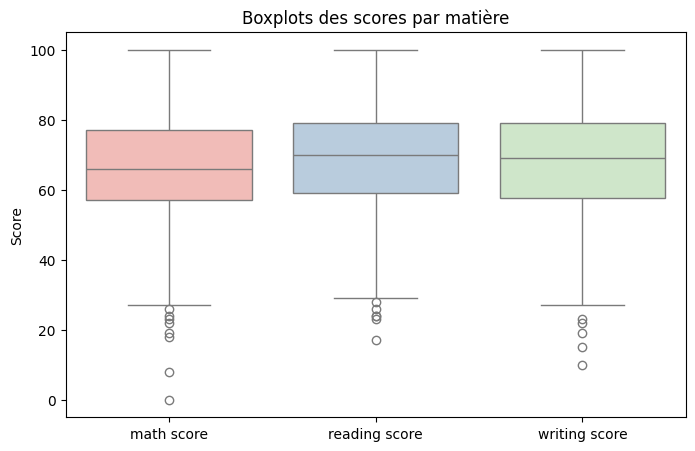

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[scores], palette="Pastel1")
plt.title("Boxplots des scores par matière")
plt.ylabel("Score")
plt.show()

<Figure size 640x480 with 0 Axes>

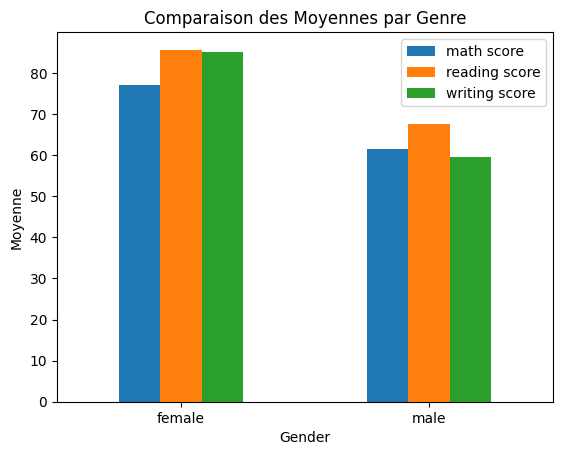

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "gender": ["female", "female", "female", "male", "male"],
    "math score": [72, 69, 90, 47, 76],
    "reading score": [72, 90, 95, 57, 78],
    "writing score": [74, 88, 93, 44, 75]
}

df = pd.DataFrame(data)

mean_scores = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()


plt.figure()
mean_scores.plot(kind="bar")

plt.title("Comparaison des Moyennes par Genre")
plt.xlabel("Gender")
plt.ylabel("Moyenne")
plt.xticks(rotation=0)
plt.show()